In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import re

# Load the dataset
file_path = '/Users/pintoza/Desktop/dev/data-science/walmart-proximity/data/processed/final_cleaned_time_distance_sample.csv' 
data = pd.read_csv(file_path)

In [2]:
# Filter out data where driving distance is greater than 23
filtered_data = data[(data['driving_distance']) < 20]

# Filter out data where driving time is greater than 40
filtered_data = filtered_data[(filtered_data['driving_time']) < 35]

data = filtered_data
data

,origin,destination,ruca,great_circle_distance,driving_time,driving_distance
0,"43.732427,-95.512519","43.636649,-95.601922",Suburban,7.984197,15.0,11.411478
1,"47.152347,-122.079177","47.16137,-122.288701",Urban,9.863802,25.0,15.126656
2,"38.841819,-89.877841","38.777672,-89.958568",Urban,6.207603,14.0,8.018171
3,"40.590853,-74.314688","40.519753,-74.393444",Urban,6.420742,18.0,8.714107
4,"27.019741,-82.123194","27.034598,-82.217057",Urban,5.867554,15.0,6.888519
...,...,...,...,...,...,...
3932,"38.777675,-81.364262","38.797775,-81.350381",Suburban,1.577207,5.0,2.338840
3933,"42.4511,-79.415421","42.453861,-79.313252",Suburban,5.212038,15.0,6.820789
3934,"43.590548,-87.85532","43.715136,-87.755227",Suburban,9.956873,17.0,12.101822
3936,"41.112548,-85.203895","41.128576,-85.138477",Urban,3.580567,11.0,6.140388


In [3]:
data[['great_circle_distance', 'driving_time']].corr()

,great_circle_distance,driving_time
great_circle_distance,1.000000,0.762308
driving_time,0.762308,1.000000


/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/walmart/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


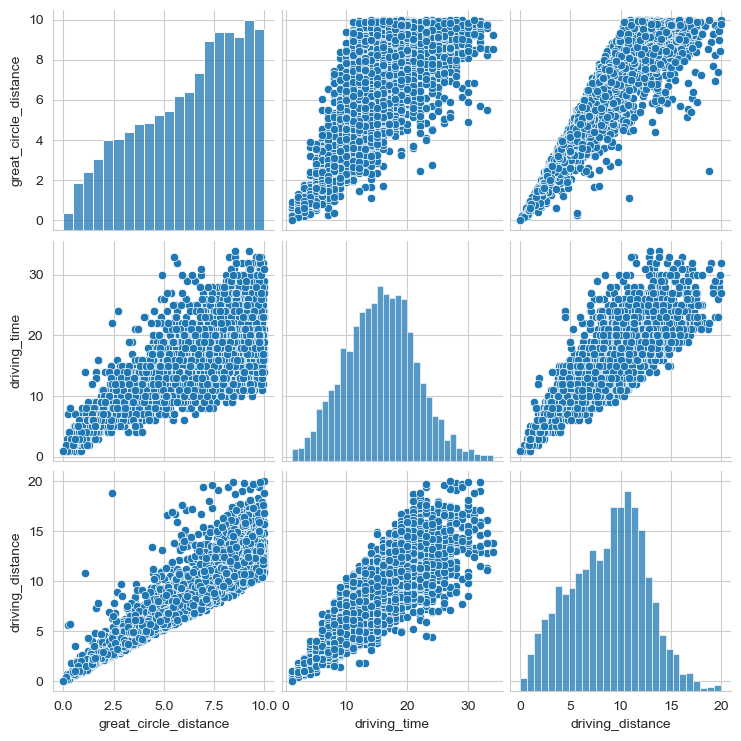

In [4]:
# Visualizing the relationships
sns.pairplot(data)
plt.show()

In [5]:
data_encoded = pd.get_dummies(data, columns=['ruca'])
data = data_encoded

In [6]:
# Including great circle distance in the model
X = data[['great_circle_distance', 'ruca_Rural', 'ruca_Suburban', 'ruca_Urban']]
y = data['driving_time']

# Create the regression model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R-squared for the combined model
predictions = model.predict(X)
r_squared = r2_score(y, predictions)
print("R-squared with Great Circle Distance and RUCA classifications:", r_squared)

R-squared with Great Circle Distance and RUCA classifications: 0.6290100532025824


In [7]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print(f"Intercept: {model.intercept_}")

                       Coefficient
great_circle_distance     1.809767
ruca_Rural               -1.119989
ruca_Suburban            -0.729187
ruca_Urban                1.849177
Intercept: 2.961072620208963
